# BANK MARKETING

## Introduction
This project is based on the Bank Marketing Dataset from the UCI Machine Learning Repository. It contains data collected from a Portuguese banking institution’s marketing campaigns. The dataset includes client information, campaign details, and economic indicators. It is well-suited for binary classification tasks and offers valuable insights into customer behavior and marketing effectiveness.

# Objective
The main objective of this project is to develop a machine learning model that can accurately predict whether a client will subscribe to a term deposit. This will help financial institutions identify potential customers, improve campaign targeting, and enhance overall marketing performance.

## Initial Step EDA (Exploratory Data Analysis)

In [5]:
# Importing necessary libraries

# Core libraries for data manipulation and numerical operations
import pandas as pd
import numpy as np
# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Loading the data set

data = pd.read_csv("bank-full.csv", sep = ';')
data

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

In [7]:
# Coverting to Data Frame

df = pd.DataFrame(data)
df

age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
0        unknown    5   may       261         1     -1         0  unknown   no  
1        unknown    5   may       151         1     -1         0  unknown   no  
2        unknown    5   may        76         1     -1         0  unknown   no  
3        unknown    5   may        92         1     -1         0  unknown   no  
4        unknown    5   may       198         1     -1         0  unknown   no  
...          ...  ...   ...       ...       ...    ...       ...      ...  ...  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no  

[45211 rows x 17 columns]

### Data description

The dataset consists of 45,211 records with 16 input features and 1 target variable. It contains client demographic data, past contact information, and socio-economic indicators. Most features are categorical, requiring preprocessing before modeling.


Feature	Description

##### age      :	Age of the client
##### job      :    Job type (e.g., admin, technician, services)
##### marital  :	Marital status
##### education :	Education level
##### default	: Has credit in default? (yes/no)
##### balance	: Average yearly account balance (in euros)
##### housing	: Has a housing loan? (yes/no)
##### loan	: Has a personal loan? (yes/no)
##### contact	: Contact communication type (cellular, telephone)
##### day_of_week :	Day of week of last contact
##### month	: Last contact month
##### duration :	Duration of last contact (in seconds)
##### campaign	: Number of contacts during this campaign
##### pdays	: Days since last contact (-1 means not previously contacted)
##### previous	: Number of contacts before this campaign
##### poutcome	: Outcome of previous marketing campaign
##### y	(Target) : Subscription to a term deposit (yes/no)?

### Initial Inspection

In [10]:
# To view first few rows 
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [11]:
# To view last few rows
df.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [12]:
# To get the dataset dimensions
print(f"Dataset contain {df.shape[0]}  Rows and {df.shape[1]} Columns ")

Dataset contain 45211  Rows and 17 Columns 


In [13]:
# Renaming column 'y' as 'Target'
df.rename(columns = {'y' : 'Target'}, inplace = True)

In [14]:
# View column names
print("Columns names: \n")
print(df.columns)

Columns names: 

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')


#### Understand the Dataset

In [16]:
# To get the basic info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  Target     45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [17]:
# Checking for missing values 
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
Target       0
dtype: int64

In [18]:
# Checking for duplicates
df.duplicated().sum()

0

In [19]:
# Descriptive statistics
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [20]:
# To get the number of unique values in each column
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
Target          2
dtype: int64

In [21]:
# Identifying numerical columns

numerical_df = df.select_dtypes ( include = 'int64')
numerical_df

age  balance  day  duration  campaign  pdays  previous
0       58     2143    5       261         1     -1         0
1       44       29    5       151         1     -1         0
2       33        2    5        76         1     -1         0
3       47     1506    5        92         1     -1         0
4       33        1    5       198         1     -1         0
...    ...      ...  ...       ...       ...    ...       ...
45206   51      825   17       977         3     -1         0
45207   71     1729   17       456         2     -1         0
45208   72     5715   17      1127         5    184         3
45209   57      668   17       508         4     -1         0
45210   37     2971   17       361         2    188        11

[45211 rows x 7 columns]

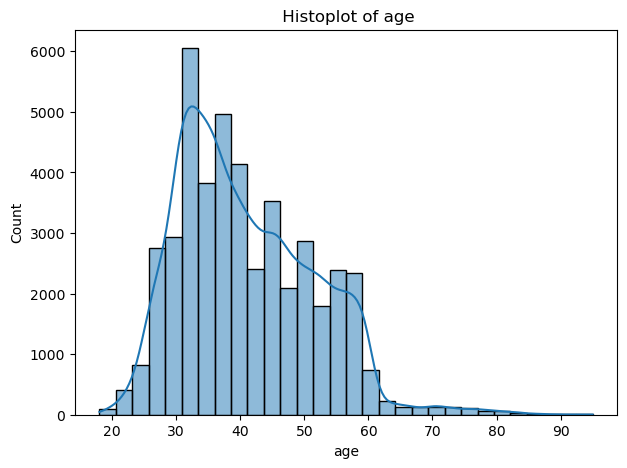

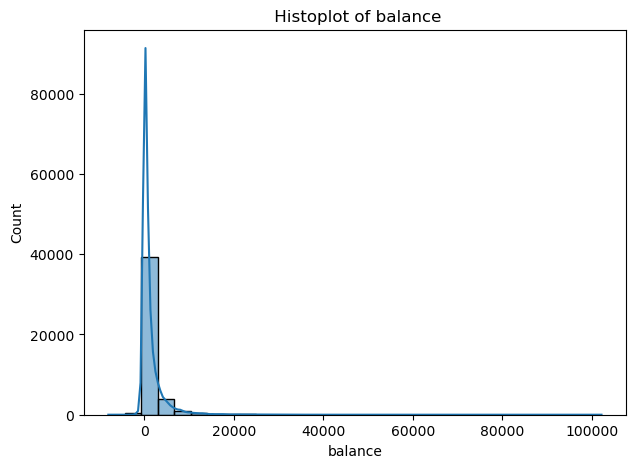

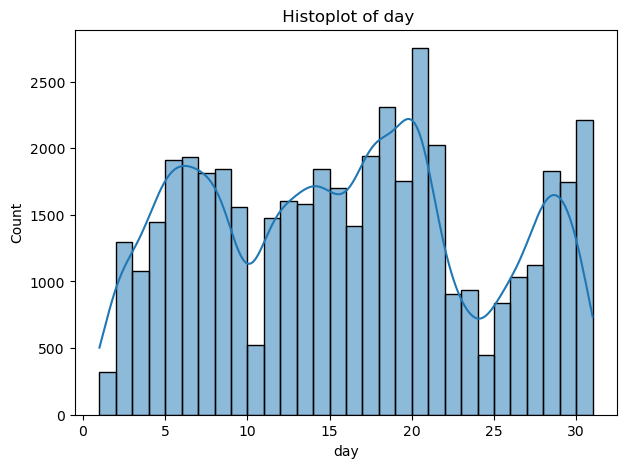

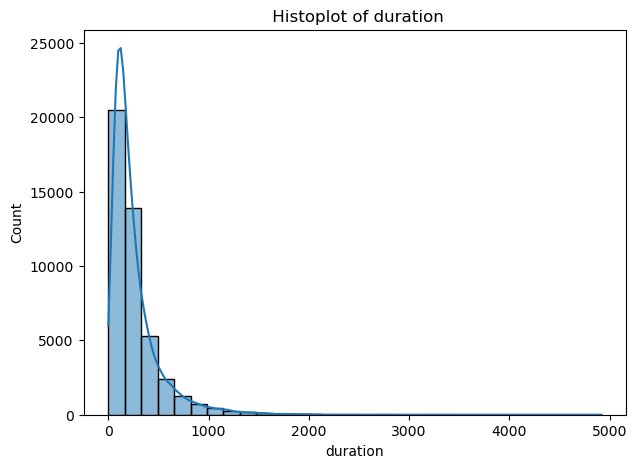

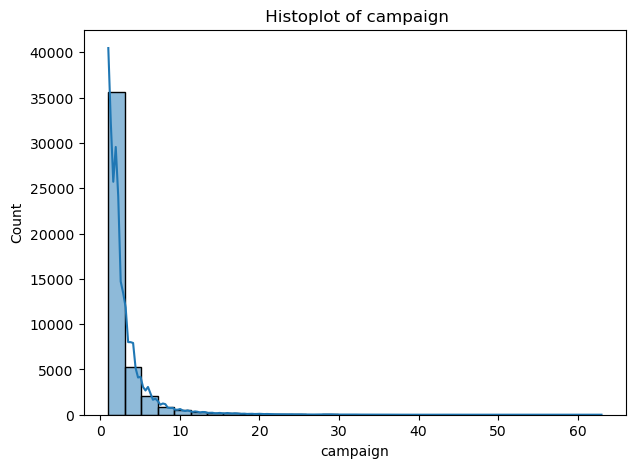

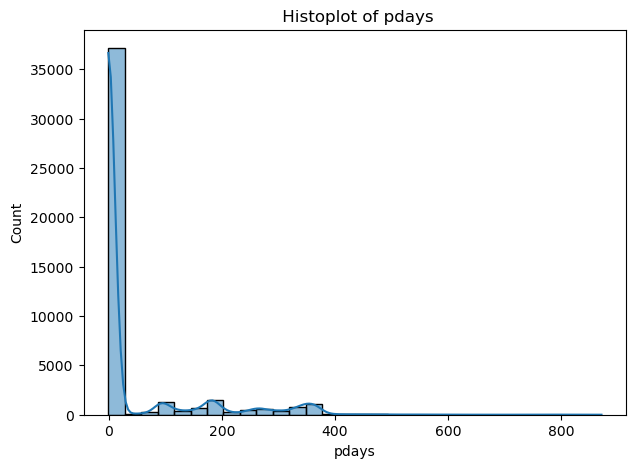

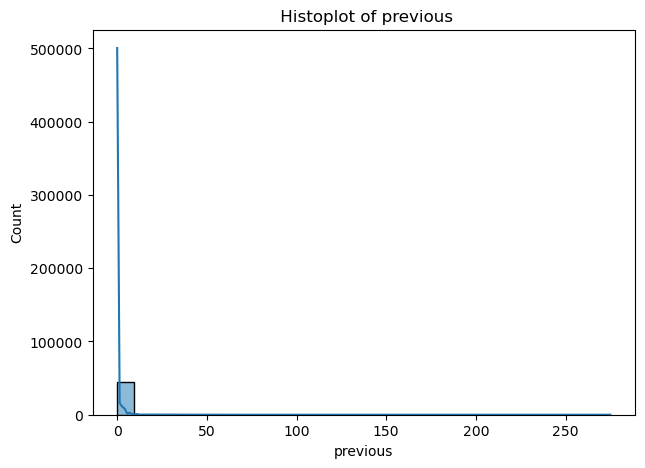

In [22]:
# Checking the distribution of Numerical columns

for col in numerical_df.columns:
    plt.figure(figsize=(7,5))
    sns.histplot(numerical_df[col], bins = 30, kde = True)
    plt.title(f' Histoplot of {col}')
    plt.show()

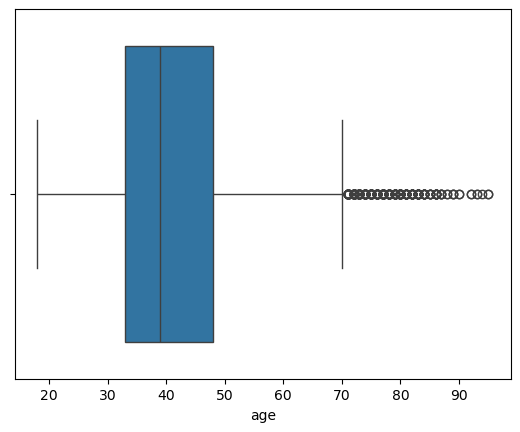

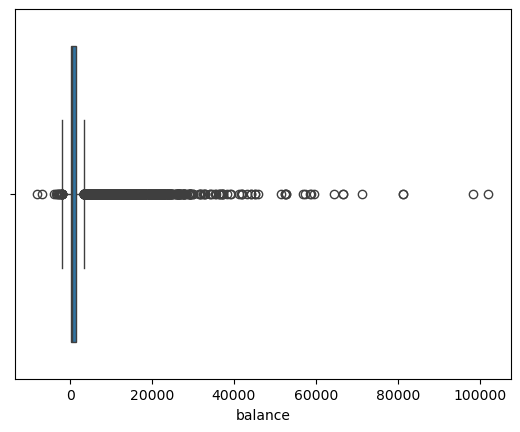

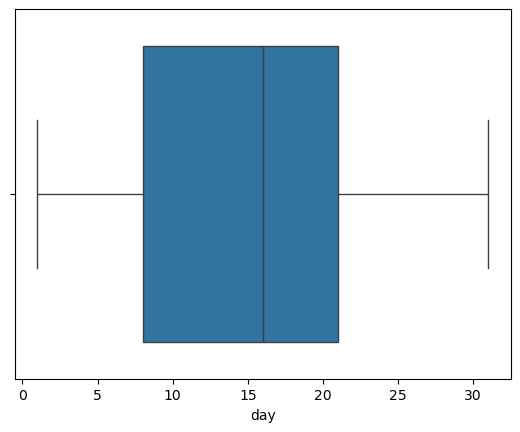

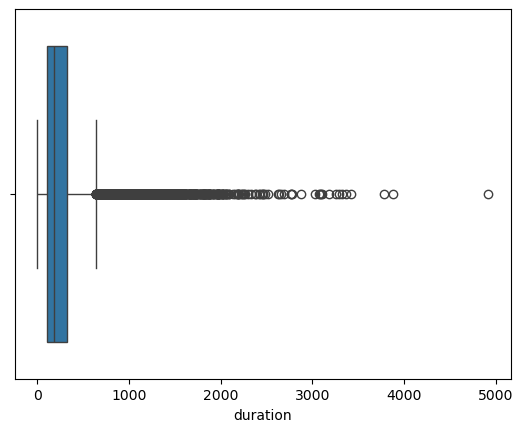

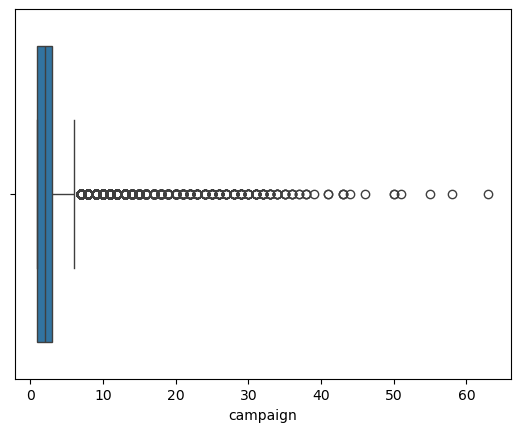

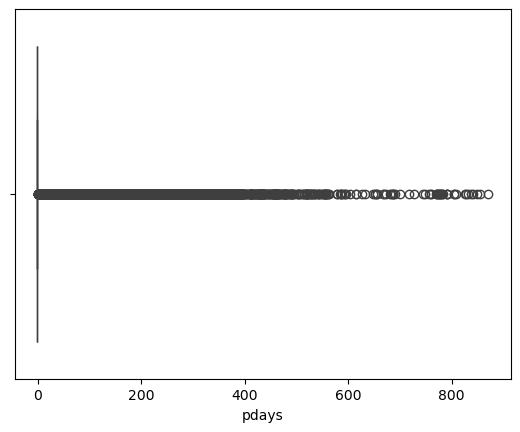

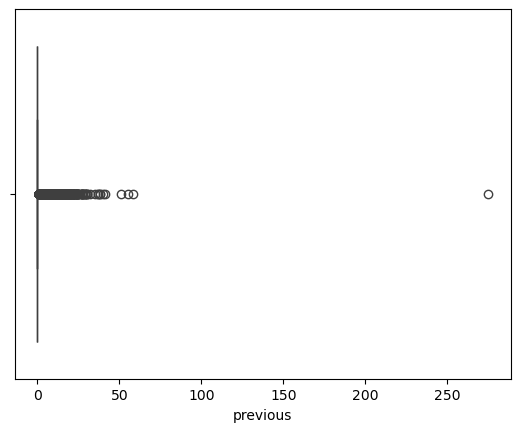

In [23]:
# Checking for Outliers
for i in numerical_df.columns:
    sns.boxplot(data=df,x=i)
    plt.show()

In [24]:
# IQR Method
def outliers(df):
    for col in numerical_df.columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1

        lower = Q1 - (1.5 * IQR)
        upper = Q3 + (1.5 * IQR)

        # Capping
        df[col] = df[col].apply(lambda x: lower if x < lower else upper if x > upper else x)

    return df

In [25]:
# Calling the function
df1 = outliers(df)

In [26]:
df1

age           job   marital  education default  balance housing loan  \
0      58.0    management   married   tertiary      no   2143.0     yes   no   
1      44.0    technician    single  secondary      no     29.0     yes   no   
2      33.0  entrepreneur   married  secondary      no      2.0     yes  yes   
3      47.0   blue-collar   married    unknown      no   1506.0     yes   no   
4      33.0       unknown    single    unknown      no      1.0      no   no   
...     ...           ...       ...        ...     ...      ...     ...  ...   
45206  51.0    technician   married   tertiary      no    825.0      no   no   
45207  70.5       retired  divorced    primary      no   1729.0      no   no   
45208  70.5       retired   married  secondary      no   3462.0      no   no   
45209  57.0   blue-collar   married  secondary      no    668.0      no   no   
45210  37.0  entrepreneur   married  secondary      no   2971.0      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome  \
0        unknown    5   may     261.0       1.0   -1.0       0.0  unknown   
1        unknown    5   may     151.0       1.0   -1.0       0.0  unknown   
2        unknown    5   may      76.0       1.0   -1.0       0.0  unknown   
3        unknown    5   may      92.0       1.0   -1.0       0.0  unknown   
4        unknown    5   may     198.0       1.0   -1.0       0.0  unknown   
...          ...  ...   ...       ...       ...    ...       ...      ...   
45206   cellular   17   nov     643.0       3.0   -1.0       0.0  unknown   
45207   cellular   17   nov     456.0       2.0   -1.0       0.0  unknown   
45208   cellular   17   nov     643.0       5.0   -1.0       0.0  success   
45209  telephone   17   nov     508.0       4.0   -1.0       0.0  unknown   
45210   cellular   17   nov     361.0       2.0   -1.0       0.0    other   

      Target  
0         no  
1         no  
2         no  
3         no  
4         no  
...      ...  
45206    yes  
45207    yes  
45208    yes  
45209     no  
45210     no  

[45211 rows x 17 columns]

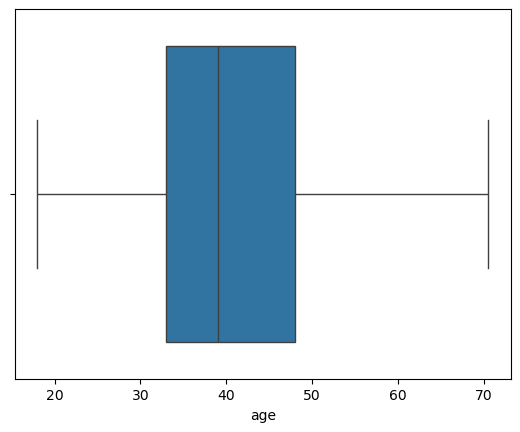

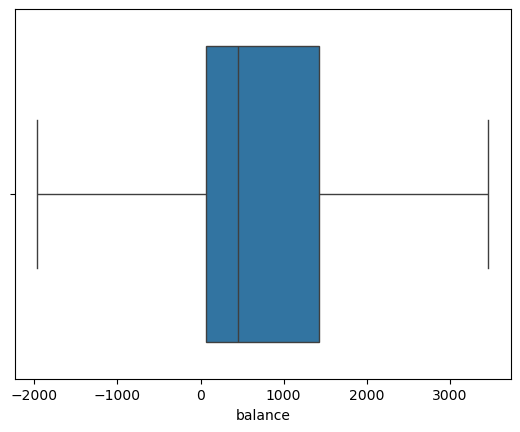

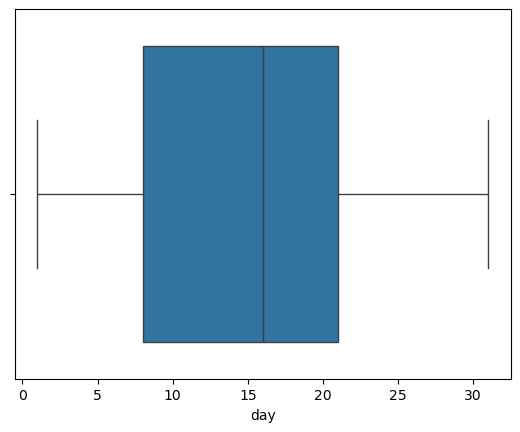

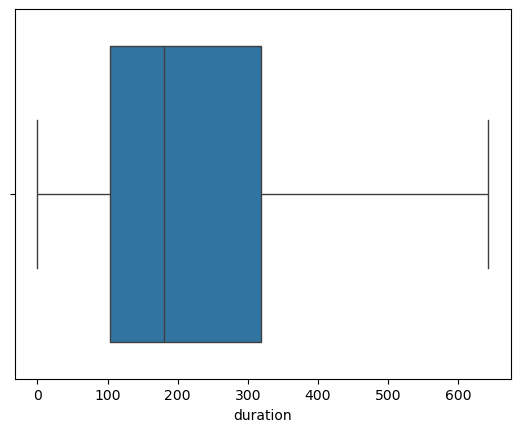

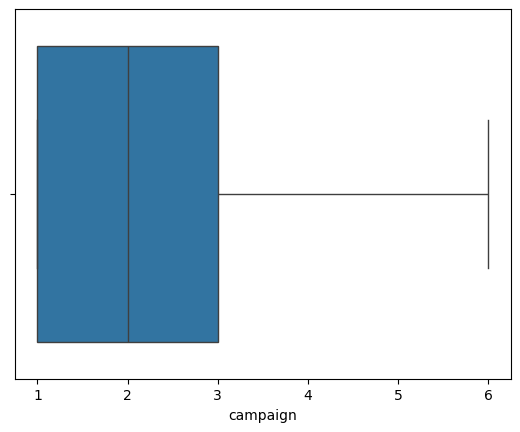

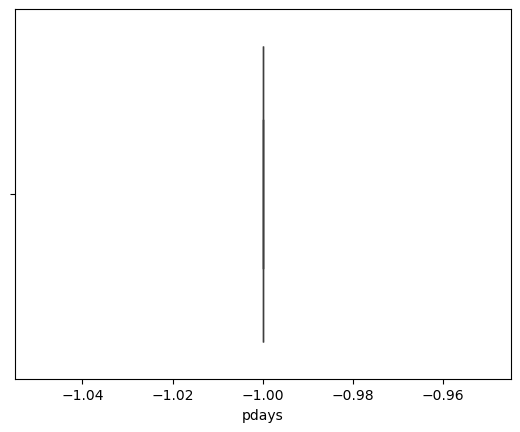

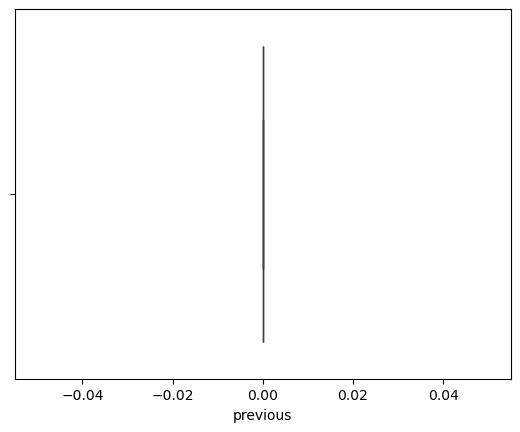

In [27]:
# Checking again to confirm there are no outliers
for i in numerical_df.columns:
    sns.boxplot(data=df1,x=i)
    plt.show()

In [28]:
# Checking the skewness
numerical_df.skew()

age          0.684818
balance      8.360308
day          0.093079
duration     3.144318
campaign     4.898650
pdays        2.615715
previous    41.846454
dtype: float64

In [29]:
# Handling Skewness

from sklearn.preprocessing import PowerTransformer

In [30]:
pt = PowerTransformer(method= 'yeo-johnson')

In [31]:
numerical_columns = df1.select_dtypes(include='number').columns

In [32]:
df1[numerical_columns] = pt.fit_transform(df1[numerical_columns])
print(df1[numerical_columns].skew())

age         0.005618
balance     0.174444
day        -0.157853
duration   -0.027948
campaign    0.176832
pdays       0.000000
previous    0.000000
dtype: float64


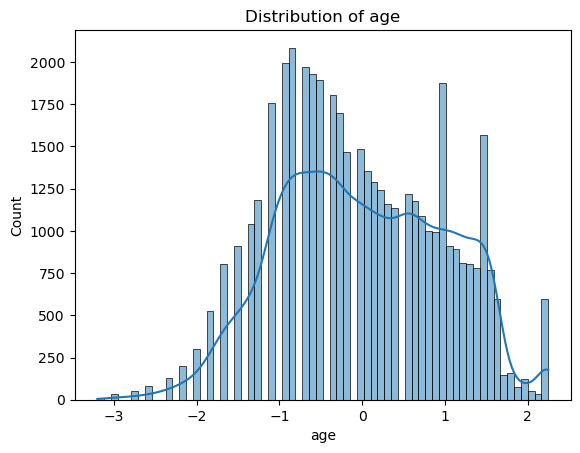

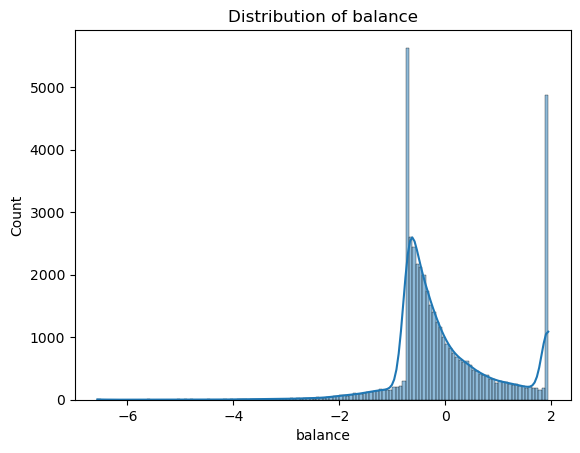

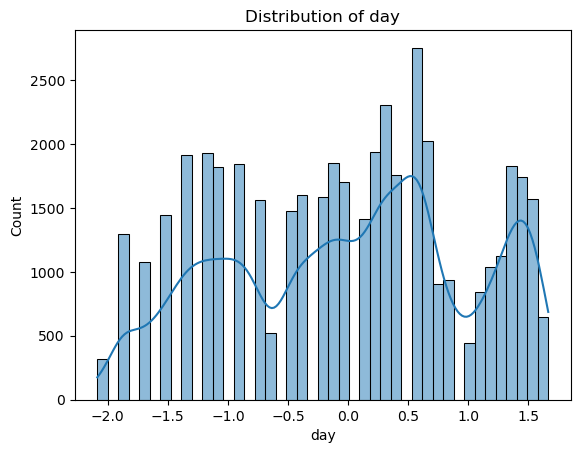

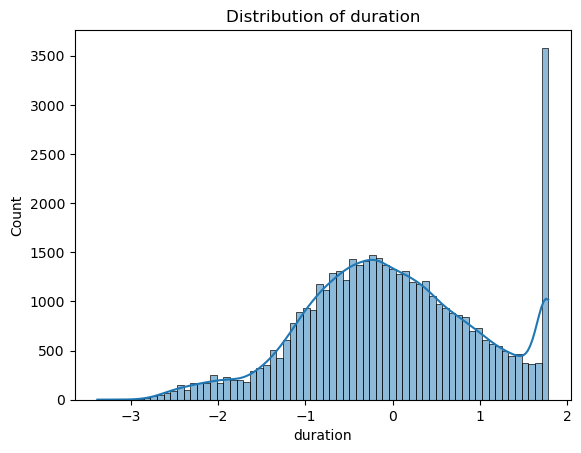

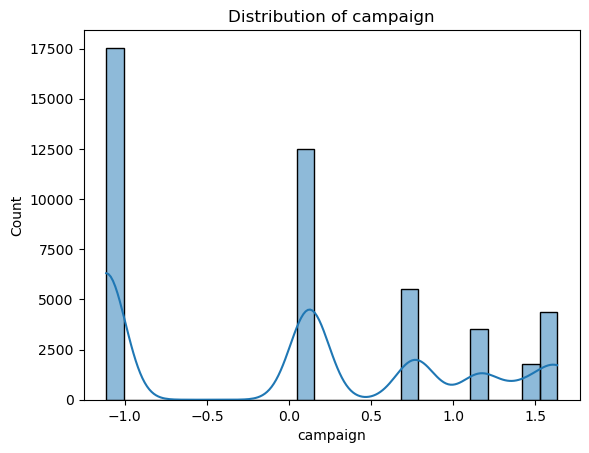

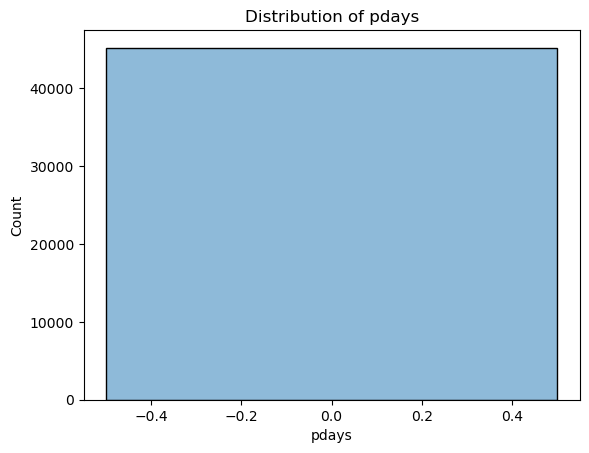

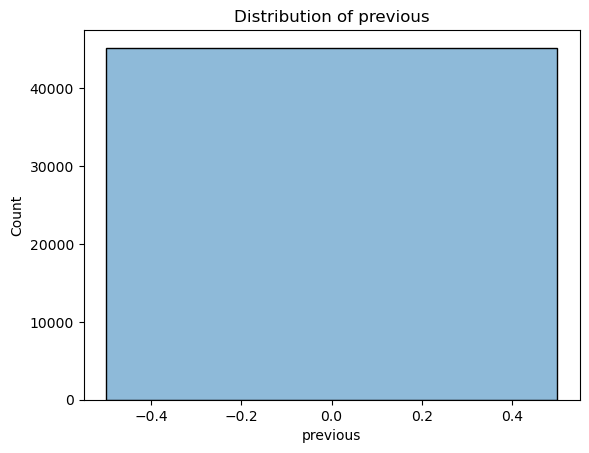

In [33]:
for i in numerical_columns:
    sns.histplot(data = df1, x= i, kde = True)
    plt.title(f'Distribution of {i}')
    plt.show()

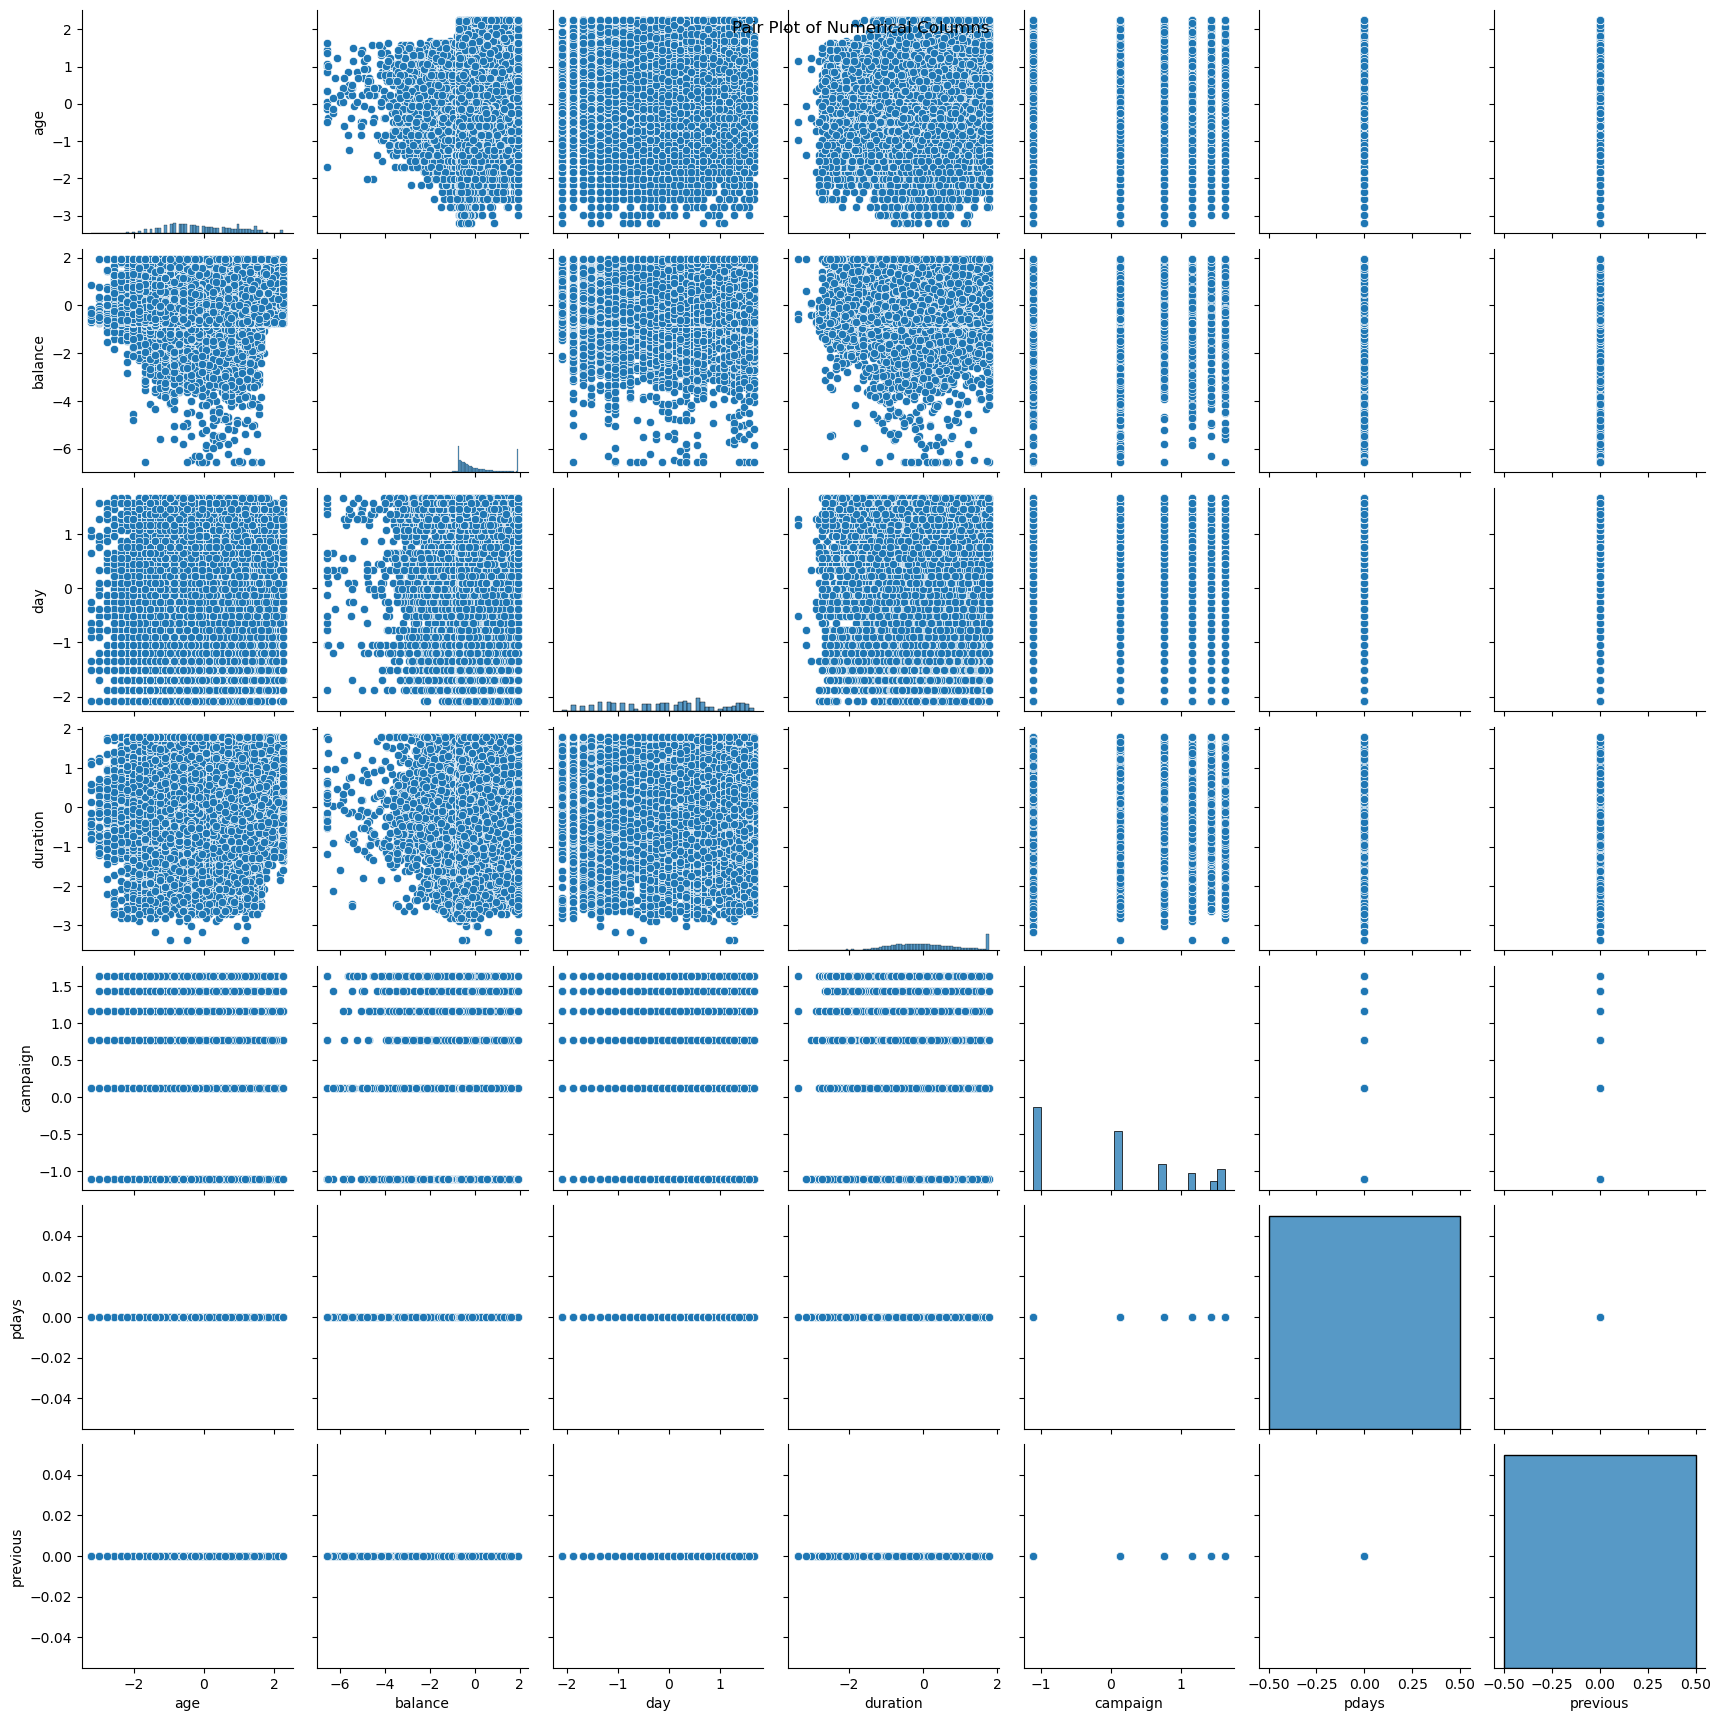

In [34]:
# Pair Plot for numerical columns

# Subset DataFrame with numerical columns only
numerical_df = df[numerical_columns]

# Simple pair plot
sns.pairplot(numerical_df)
plt.suptitle("Pair Plot of Numerical Columns")
plt.show()

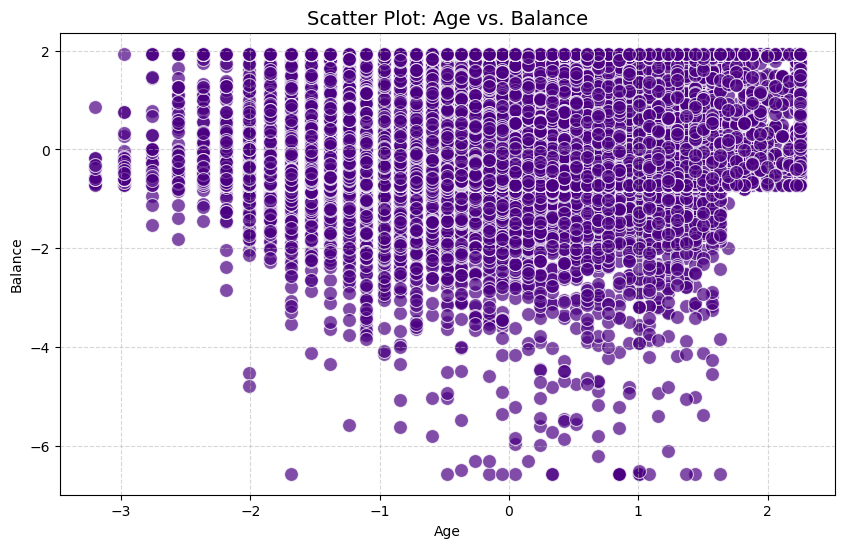

In [35]:
# Scatter plot between age and balance
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df, x='age', y='balance', color='indigo', alpha=0.7, edgecolor='w', s=100)
plt.title("Scatter Plot: Age vs. Balance", fontsize=14)
plt.xlabel("Age")
plt.ylabel("Balance")
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

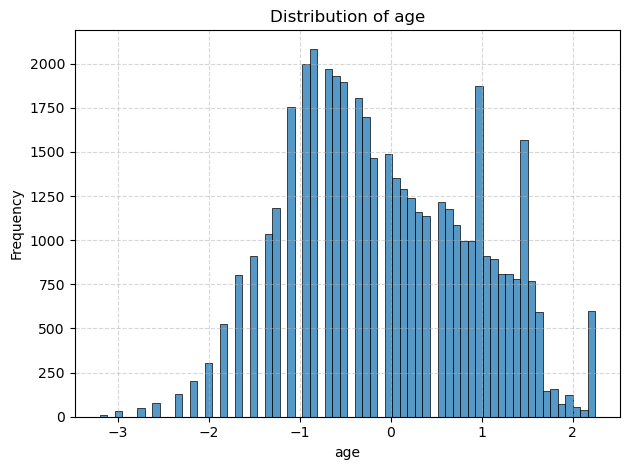

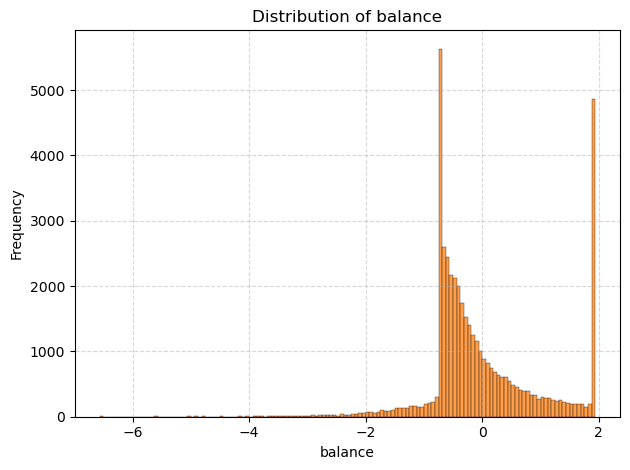

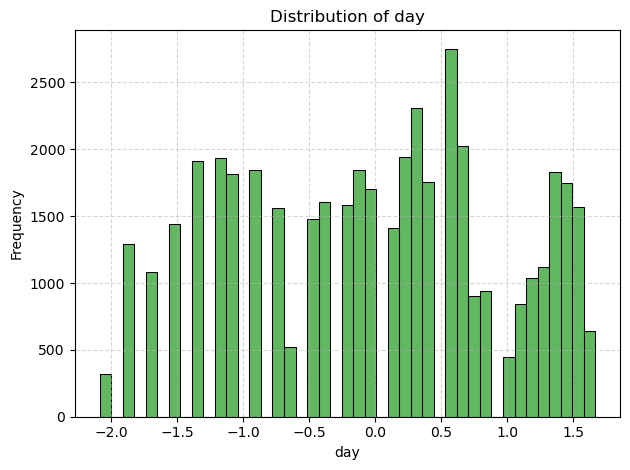

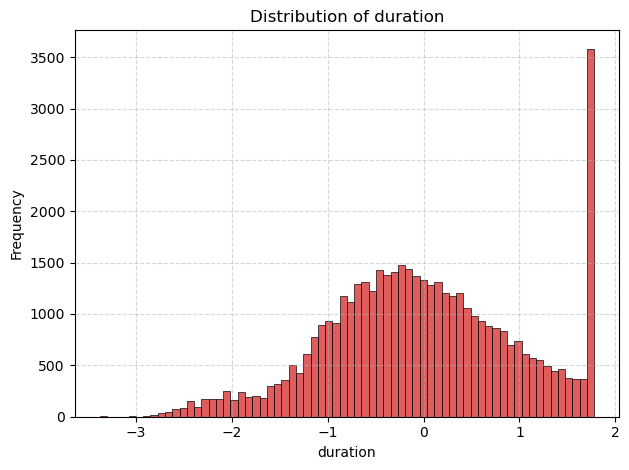

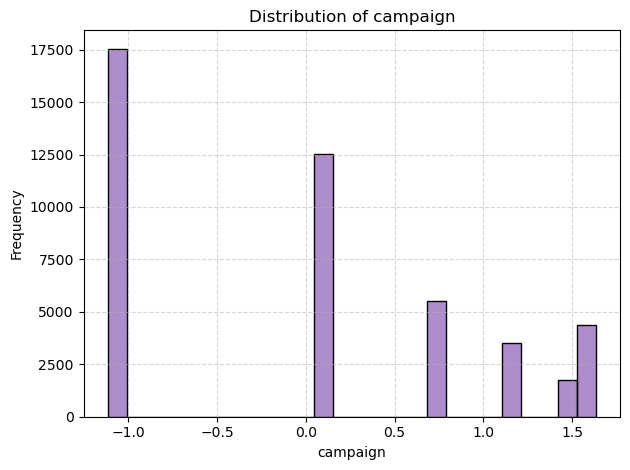

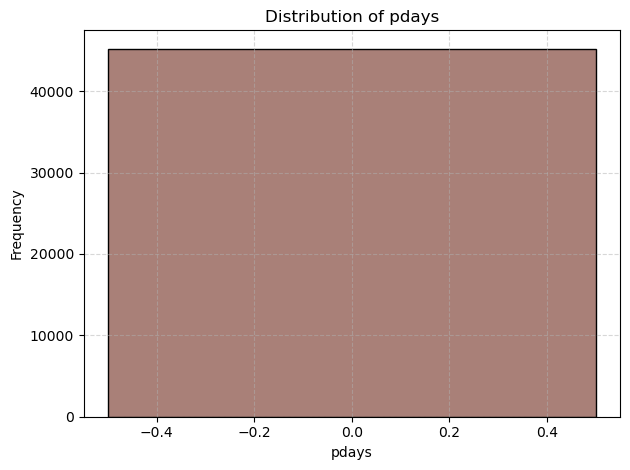

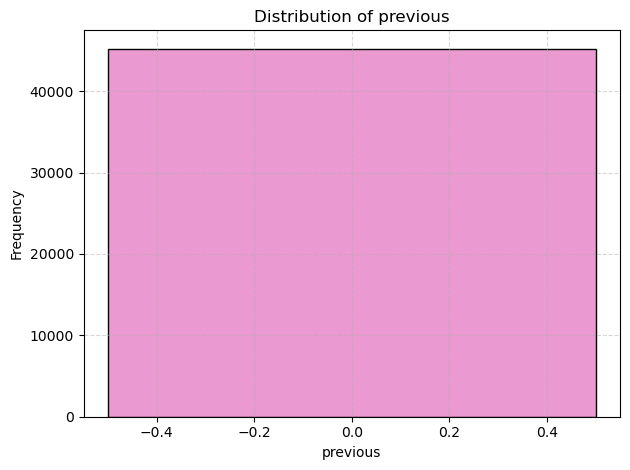

In [36]:
# Histplot for Numerical columns
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', 
          '#9467bd', '#8c564b', '#e377c2', '#7f7f7f']
for idx, i in enumerate(numerical_columns):
    sns.histplot(data=df1, x=i, color=colors[idx % len(colors)])
    plt.title(f'Distribution of {i}', fontsize=12)
    plt.xlabel(i)
    plt.ylabel("Frequency")
    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.show()

In [37]:
# Identifying categorical columns
categorical_df = df.select_dtypes(include='object')
categorical_df

job   marital  education default housing loan    contact  \
0        management   married   tertiary      no     yes   no    unknown   
1        technician    single  secondary      no     yes   no    unknown   
2      entrepreneur   married  secondary      no     yes  yes    unknown   
3       blue-collar   married    unknown      no     yes   no    unknown   
4           unknown    single    unknown      no      no   no    unknown   
...             ...       ...        ...     ...     ...  ...        ...   
45206    technician   married   tertiary      no      no   no   cellular   
45207       retired  divorced    primary      no      no   no   cellular   
45208       retired   married  secondary      no      no   no   cellular   
45209   blue-collar   married  secondary      no      no   no  telephone   
45210  entrepreneur   married  secondary      no      no   no   cellular   

      month poutcome Target  
0       may  unknown     no  
1       may  unknown     no  
2       may  unknown     no  
3       may  unknown     no  
4       may  unknown     no  
...     ...      ...    ...  
45206   nov  unknown    yes  
45207   nov  unknown    yes  
45208   nov  success    yes  
45209   nov  unknown     no  
45210   nov    other     no  

[45211 rows x 10 columns]

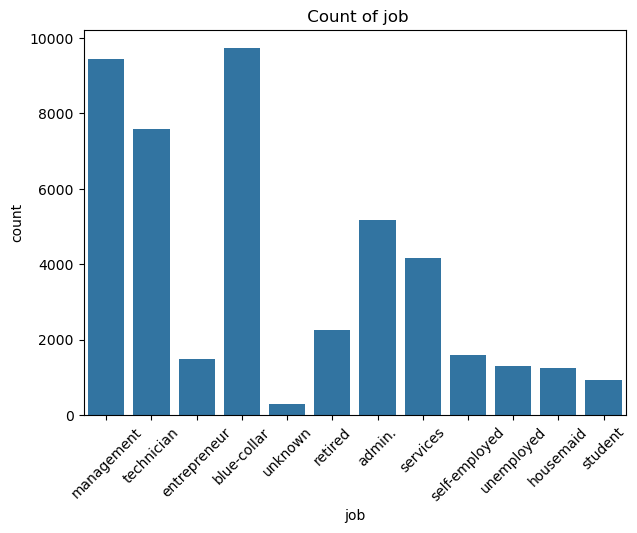

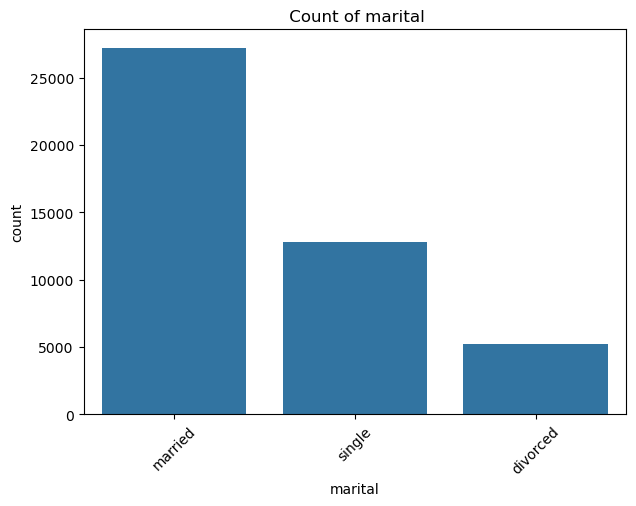

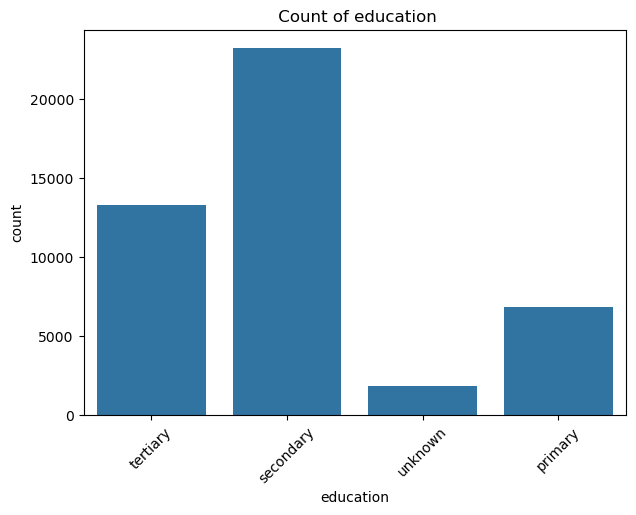

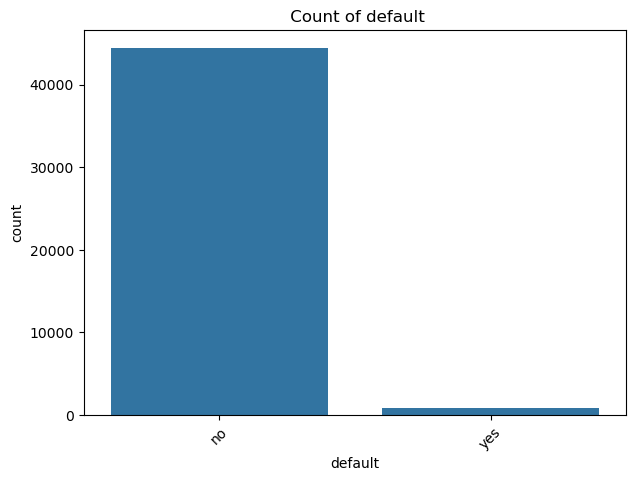

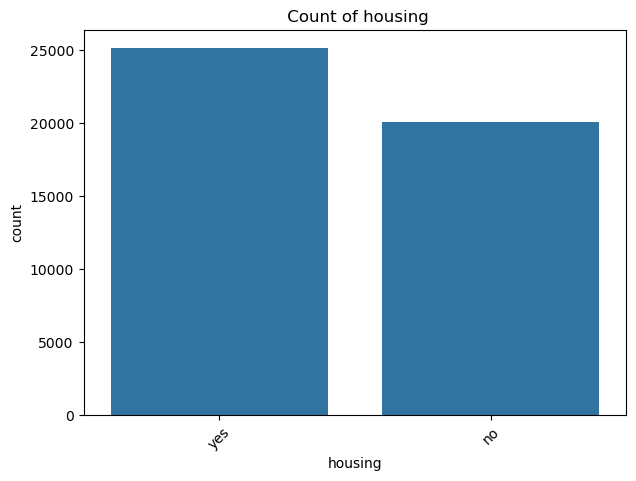

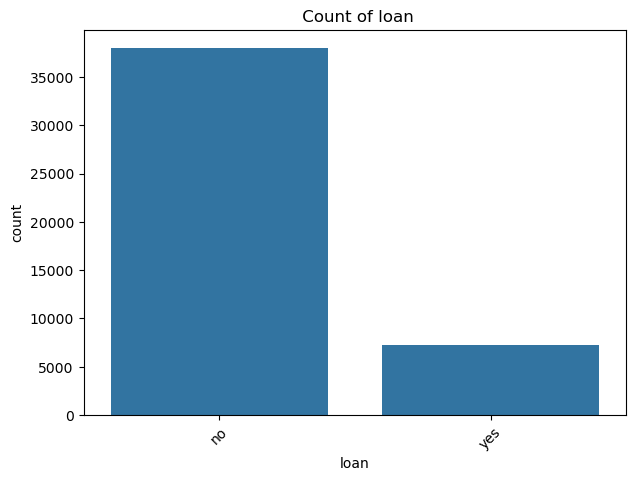

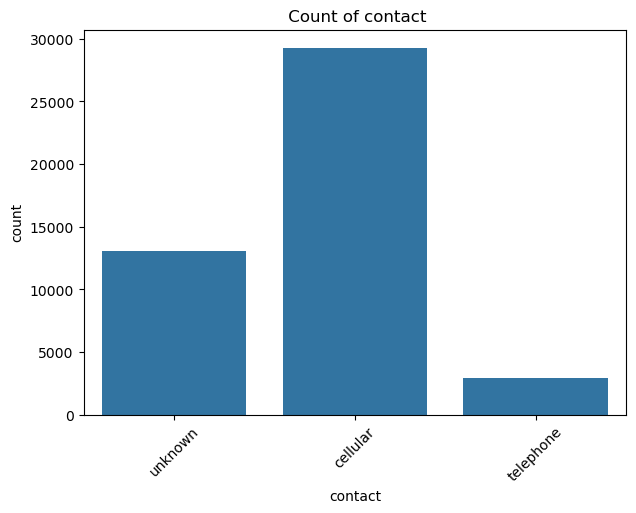

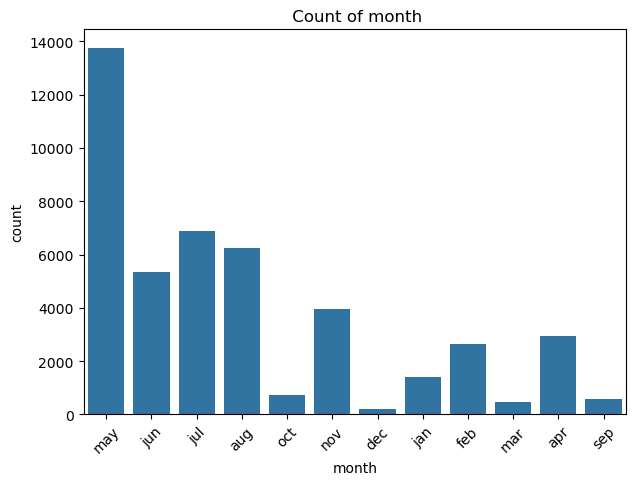

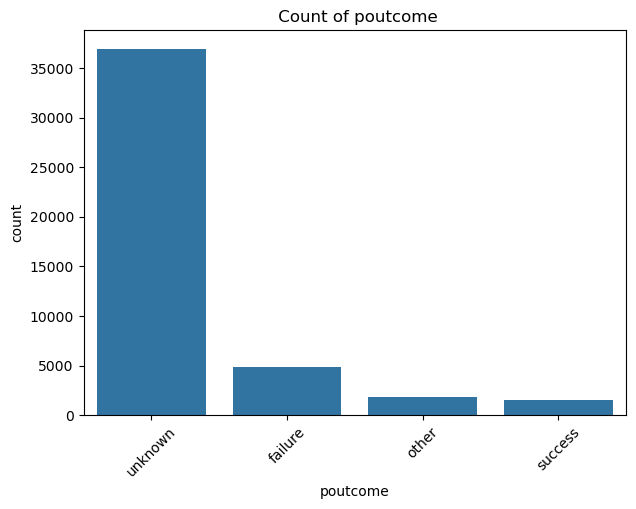

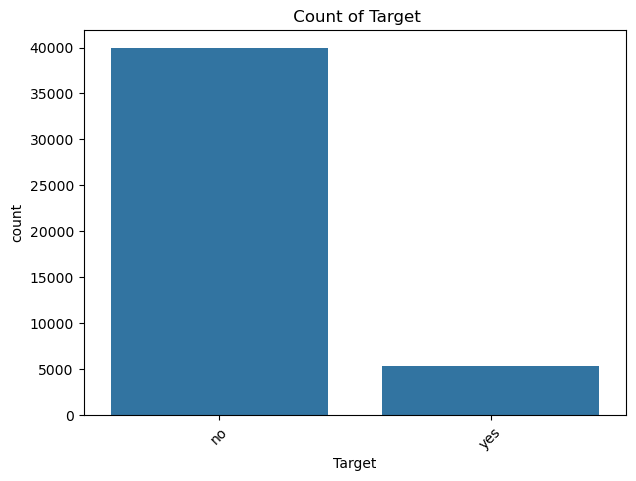

In [38]:
# Checking the distribution of Categorical columns

for col in categorical_df:
    plt.figure(figsize=(7,5))
    sns.countplot( data = df, x= col)
    plt.title(f' Count of {col}')
    plt.xticks ( rotation = 45)
    plt.show()

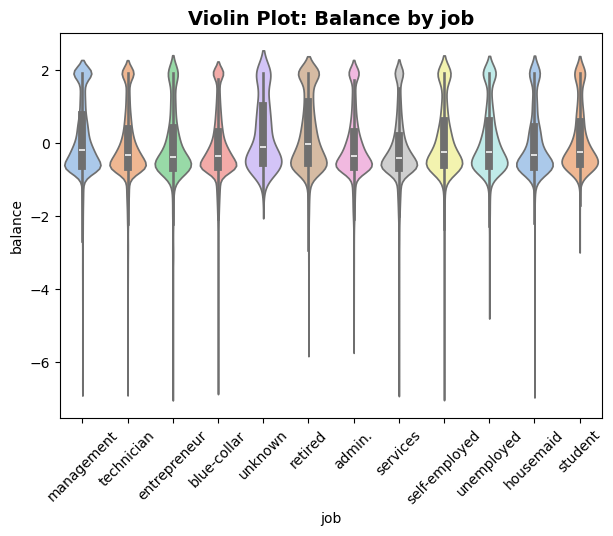

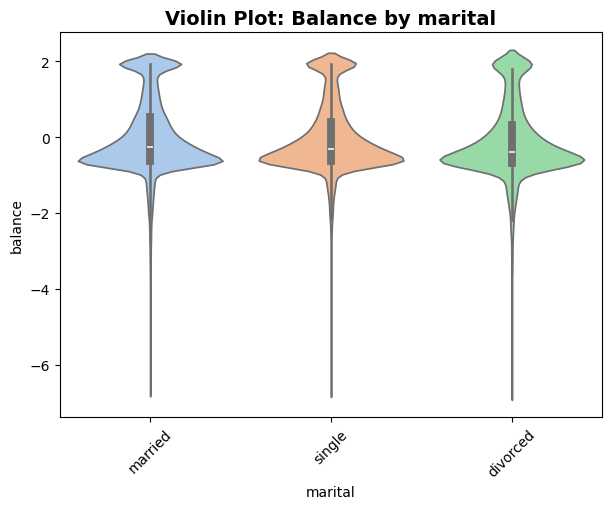

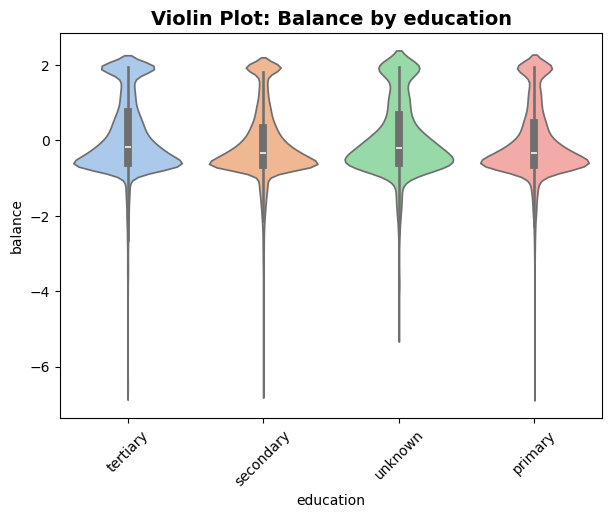

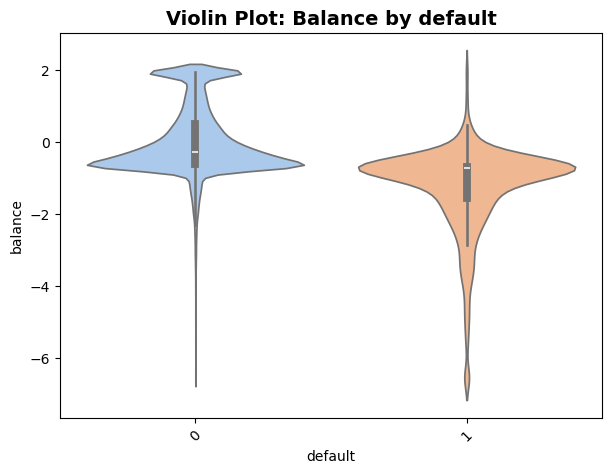

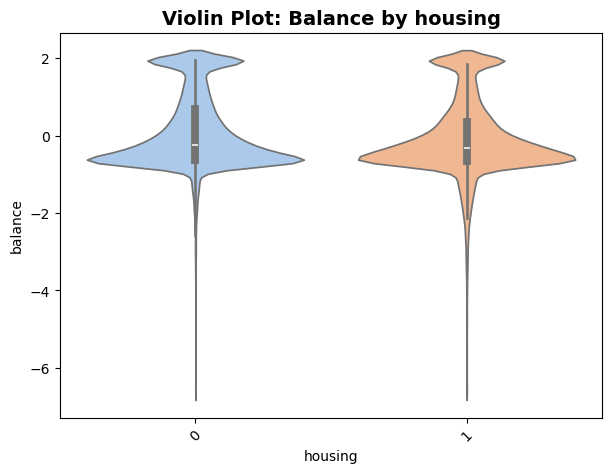

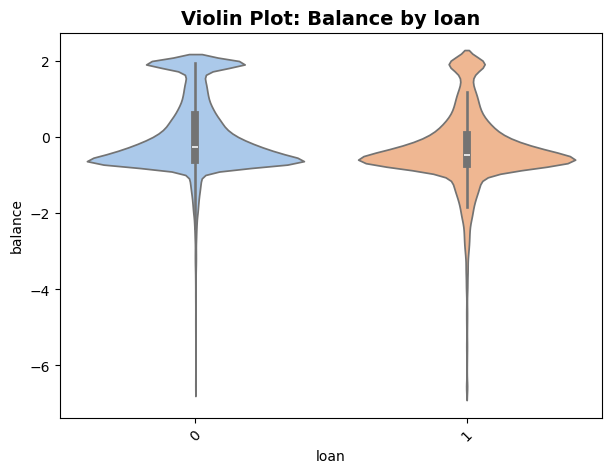

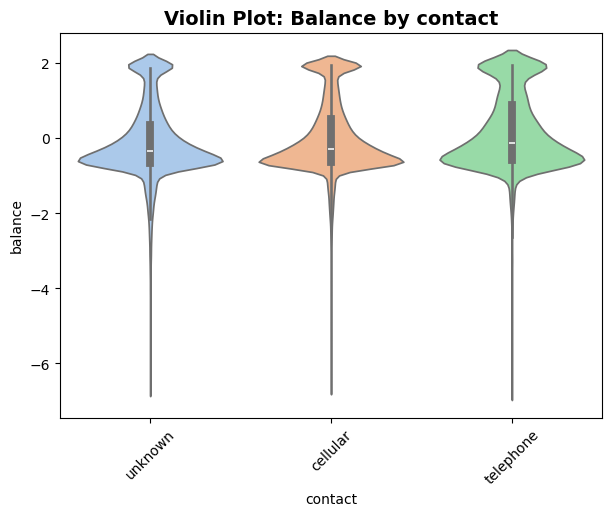

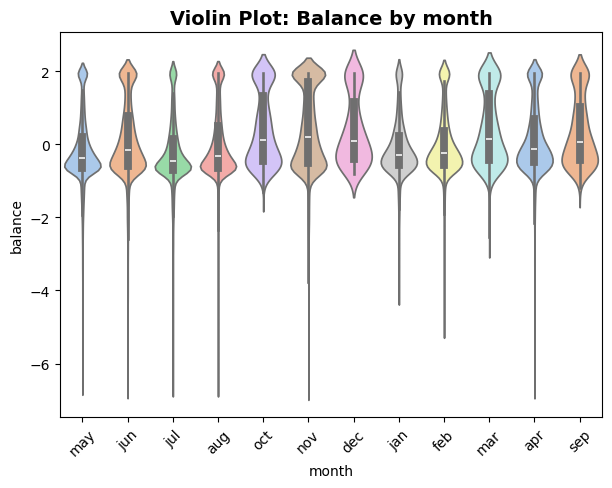

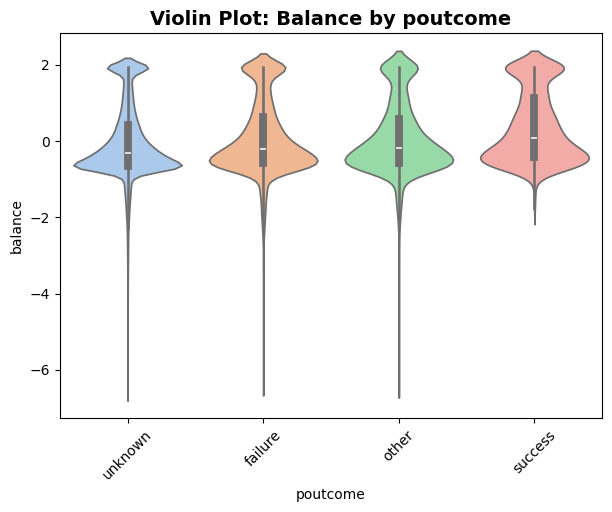

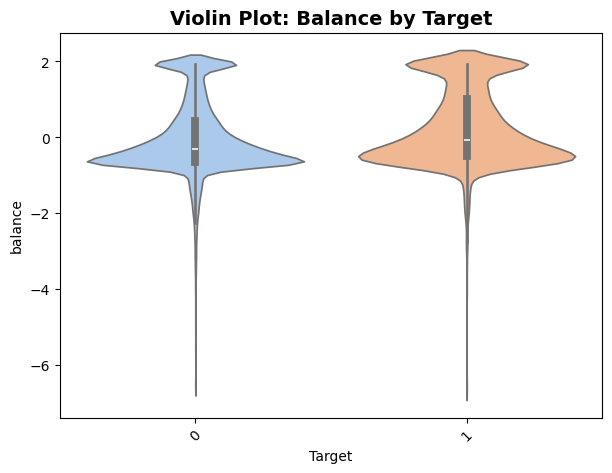

In [142]:
# Violin plot

for col in categorical_df:
    plt.figure(figsize=(7,5))
    sns.violinplot(data=df, x=col, y='balance', hue=col, palette='pastel', legend=False)
    plt.title(f'Violin Plot: Balance by {col}', fontsize=14, fontweight='bold')
    plt.xticks(rotation=45)
    plt.show()

### Encoding

In [40]:
# Importing the libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [41]:
le = LabelEncoder()

In [42]:
# Applying label encoding
# Boolean and Traget - Label encoding
df1['Target'] = le.fit_transform(df1['Target'])
df1['default'] = le.fit_transform(df1['default'])
df1['housing'] = le.fit_transform(df1['housing'])
df1['loan'] = le.fit_transform(df1['loan'])

In [43]:
# Define categorical columns
oho_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']

In [44]:
oho = OneHotEncoder(drop= 'first', sparse_output=False, dtype=int )

In [45]:
# Fit and transform
encoded_array = oho.fit_transform(df1[oho_cols])

In [46]:
# Converting to DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=oho.get_feature_names_out(oho_cols),index = df1.index)

In [47]:
# Combining with the rest of the dataset
df_encoded = pd.concat([df1.drop(columns=oho_cols), encoded_df], axis = 1)

In [48]:
df_encoded.head()

age  default   balance  housing  loan       day  duration  campaign  \
0  1.502190        0  1.007085        1     0 -1.351873  0.412248 -1.113596   
1  0.426912        0 -0.680874        1     0 -1.351873 -0.264939 -1.113596   
2 -0.717526        0 -0.713062        1     1 -1.351873 -0.978769 -1.113596   
3  0.685811        0  0.537649        1     0 -1.351873 -0.793941 -1.113596   
4 -0.717526        0 -0.714476        0     0 -1.351873  0.057359 -1.113596   

   pdays  previous  ...  month_jul  month_jun  month_mar  month_may  \
0    0.0       0.0  ...          0          0          0          1   
1    0.0       0.0  ...          0          0          0          1   
2    0.0       0.0  ...          0          0          0          1   
3    0.0       0.0  ...          0          0          0          1   
4    0.0       0.0  ...          0          0          0          1   

   month_nov  month_oct  month_sep  poutcome_other  poutcome_success  \
0          0          0          0               0                 0   
1          0          0          0               0                 0   
2          0          0          0               0                 0   
3          0          0          0               0                 0   
4          0          0          0               0                 0   

   poutcome_unknown  
0                 1  
1                 1  
2                 1  
3                 1  
4                 1  

[5 rows x 43 columns]

In [49]:
df_encoded.shape

(45211, 43)

In [50]:
df_encoded.columns

Index(['age', 'default', 'balance', 'housing', 'loan', 'day', 'duration',
       'campaign', 'pdays', 'previous', 'Target', 'job_blue-collar',
       'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired',
       'job_self-employed', 'job_services', 'job_student', 'job_technician',
       'job_unemployed', 'job_unknown', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [51]:
# Finding the corelation

cor = df_encoded.corr()

In [52]:
cor

age   default   balance   housing      loan  \
age                  1.000000 -0.015586  0.104697 -0.157672 -0.007659   
default             -0.015586  1.000000 -0.170392 -0.006025  0.077234   
balance              0.104697 -0.170392  1.000000 -0.094340 -0.138400   
housing             -0.157672 -0.006025 -0.094340  1.000000  0.041323   
loan                -0.007659  0.077234 -0.138400  0.041323  1.000000   
day                 -0.005256  0.008784  0.002823 -0.021017  0.010623   
duration            -0.020448 -0.007505  0.037558  0.001376 -0.011550   
campaign             0.036282  0.013877 -0.026468 -0.038277  0.001208   
pdays                     NaN       NaN       NaN       NaN       NaN   
previous                  NaN       NaN       NaN       NaN       NaN   
Target              -0.003575 -0.022419  0.094898 -0.139173 -0.068185   
job_blue-collar     -0.028534  0.010341 -0.049369  0.177475  0.018291   
job_entrepreneur     0.029551  0.026281 -0.006404  0.010600  0.039808   
job_housemaid        0.087173 -0.000359  0.006249 -0.079380 -0.017234   
job_management      -0.008628 -0.002655  0.065088 -0.063382 -0.038904   
job_retired          0.372744 -0.011290  0.062830 -0.156633 -0.014861   
job_self-employed   -0.004084  0.004107  0.016033 -0.027319 -0.007882   
job_services        -0.061042  0.000068 -0.047046  0.070435  0.035575   
job_student         -0.242804 -0.016222  0.017103 -0.085066 -0.058503   
job_technician      -0.056391 -0.003089 -0.018758 -0.012823  0.014798   
job_unemployed       0.003743  0.006470  0.015050 -0.048229 -0.035961   
job_unknown          0.049150 -0.006669  0.020865 -0.075023 -0.031943   
marital_married      0.311736 -0.014460  0.027642  0.017681  0.036906   
marital_single      -0.459909  0.003115 -0.004180 -0.020475 -0.051716   
education_secondary -0.091418  0.013220 -0.079784  0.101659  0.070625   
education_tertiary  -0.074822 -0.015239  0.084133 -0.099175 -0.045940   
education_unknown    0.060873 -0.001236  0.018992 -0.047595 -0.049992   
contact_telephone    0.142067 -0.017208  0.052038 -0.080822 -0.013183   
contact_unknown     -0.004862  0.019933 -0.057850  0.208409 -0.007211   
month_aug            0.078798 -0.007521  0.011550 -0.305641 -0.069359   
month_dec            0.011214 -0.009344  0.025926 -0.050556 -0.020459   
month_feb           -0.008070 -0.009027  0.004258 -0.064523 -0.008842   
month_jan           -0.012757 -0.006990 -0.015423 -0.066448 -0.004450   
month_jul            0.004980  0.044257 -0.096538 -0.061231  0.167764   
month_jun            0.059641  0.007582  0.047203 -0.102298 -0.022749   
month_mar            0.003228 -0.013991  0.042787 -0.066284 -0.029761   
month_may           -0.120668 -0.002946 -0.105103  0.427980 -0.027867   
month_nov            0.043367  0.006129  0.134953  0.001152  0.019154   
month_oct            0.039284 -0.017454  0.052446 -0.085439 -0.030097   
month_sep            0.010938 -0.013953  0.038671 -0.076343 -0.033663   
poutcome_other      -0.027335 -0.014445  0.016536  0.039710 -0.009099   
poutcome_success     0.017178 -0.023344  0.066612 -0.091360 -0.053713   
poutcome_unknown     0.007848  0.039490 -0.065545 -0.063755  0.031406   

                          day  duration  campaign  pdays  previous  ...  \
age                 -0.005256 -0.020448  0.036282    NaN       NaN  ...   
default              0.008784 -0.007505  0.013877    NaN       NaN  ...   
balance              0.002823  0.037558 -0.026468    NaN       NaN  ...   
housing             -0.021017  0.001376 -0.038277    NaN       NaN  ...   
loan                 0.010623 -0.011550  0.001208    NaN       NaN  ...   
day                  1.000000 -0.053035  0.138647    NaN       NaN  ...   
duration            -0.053035  1.000000 -0.114731    NaN       NaN  ...   
campaign             0.138647 -0.114731  1.000000    NaN       NaN  ...   
pdays                     NaN       NaN       NaN    NaN       NaN  ...   
previous                  NaN       NaN       NaN    NaN       

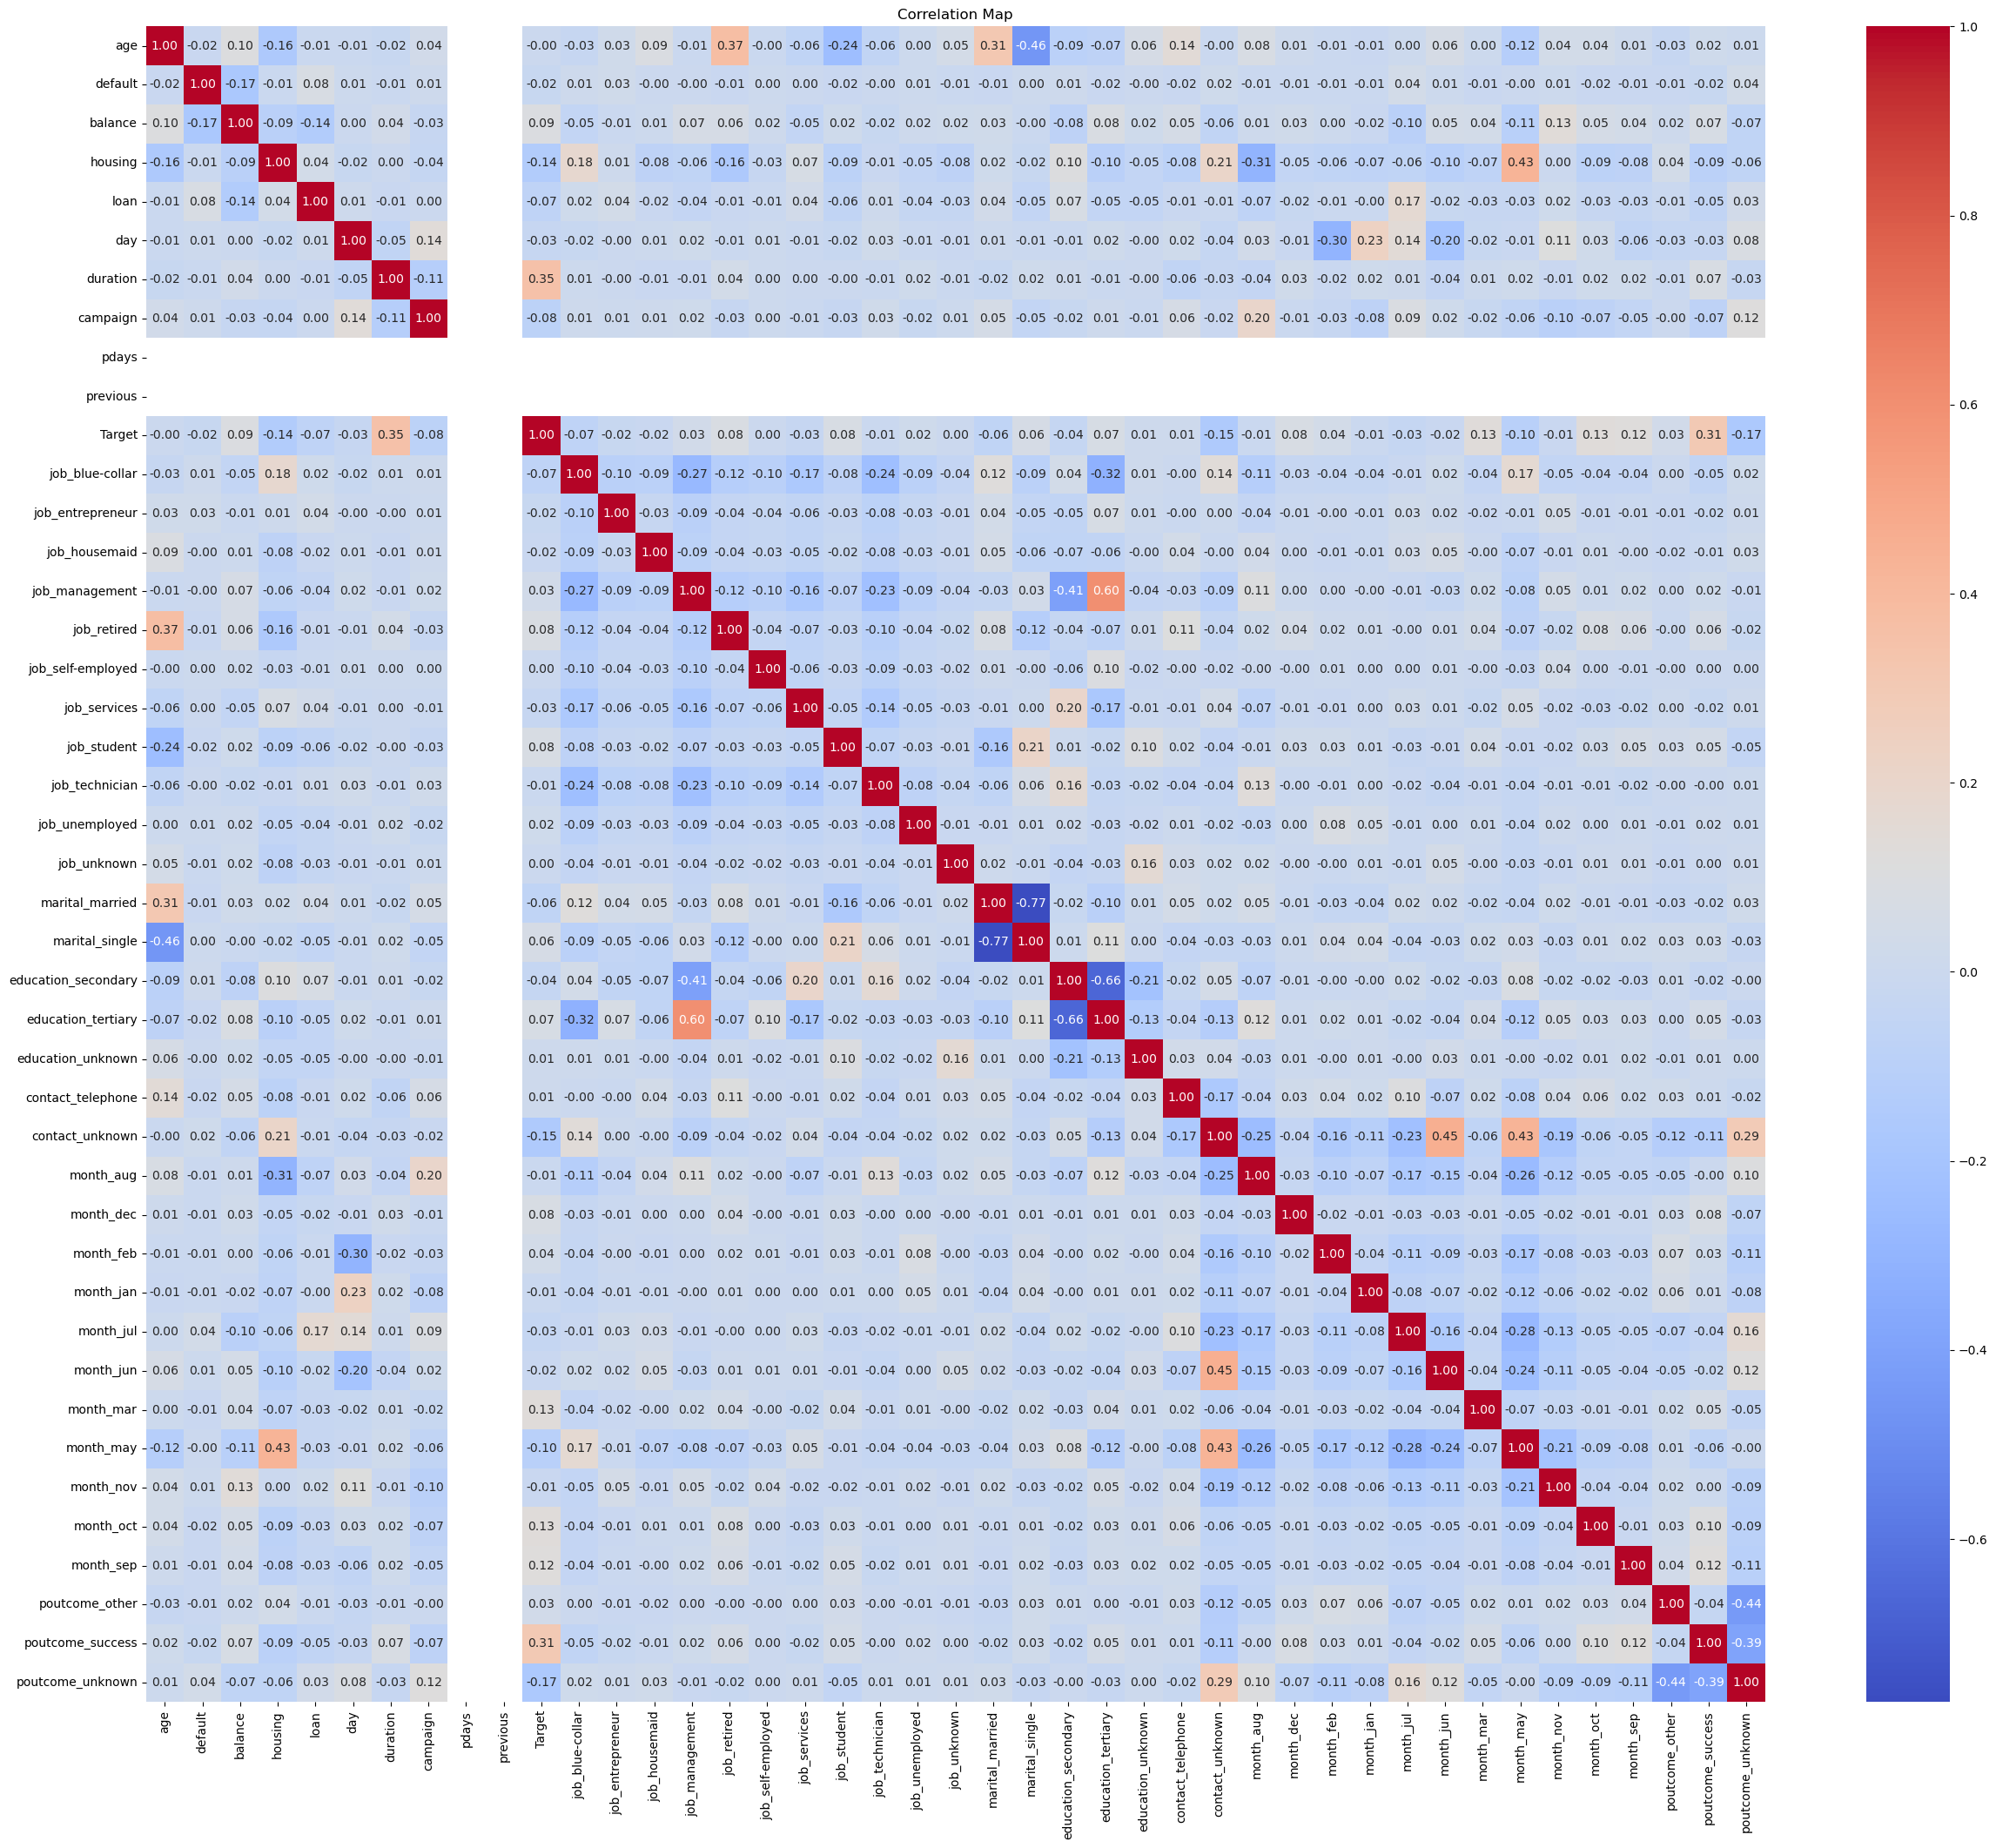

In [53]:
# Plotting the Heat map
plt.figure(figsize=(30,25))
sns.heatmap(cor, annot= True, cmap='coolwarm',fmt='.2f')
plt.title('Correlation Map')
plt.show()

## Feature Selection

In [55]:
# Splitting into X and y

X = df_encoded.drop('Target', axis=1)
y = df_encoded['Target']

In [56]:
from sklearn.feature_selection import SelectKBest,f_classif

In [57]:
sk = SelectKBest(score_func=f_classif, k = 20)

In [58]:
k_best = sk.fit_transform(X,y)

C:\Users\sibin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\sibin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [59]:
selected_features = X.columns[sk.get_support()]

In [60]:
selected_features

Index(['balance', 'housing', 'loan', 'duration', 'campaign', 'job_blue-collar',
       'job_retired', 'job_student', 'marital_married', 'marital_single',
       'education_tertiary', 'contact_unknown', 'month_dec', 'month_feb',
       'month_mar', 'month_may', 'month_oct', 'month_sep', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [61]:
feature_score = pd.DataFrame({
    'Features' : X.columns,
    'Score' : sk.scores_
}).sort_values(by ='Score', ascending = False)

In [62]:
feature_score

Features        Score
6              duration  6376.731802
40     poutcome_success  4697.113837
41     poutcome_unknown  1297.815887
27      contact_unknown  1053.932776
3               housing   892.950576
34            month_mar   770.566237
37            month_oct   759.412860
38            month_sep   696.599372
35            month_may   480.019957
2               balance   410.837267
7              campaign   321.656249
14          job_retired   285.698413
17          job_student   268.917823
29            month_dec   256.868313
10      job_blue-collar   236.131946
4                  loan   211.167395
24   education_tertiary   200.499806
22       marital_single   183.181227
21      marital_married   164.766391
30            month_feb    66.821798
23  education_secondary    59.939107
32            month_jul    53.504294
13       job_management    49.043706
39       poutcome_other    46.211124
5                   day    41.944992
16         job_services    35.127526
1               default    22.733923
19       job_unemployed    18.803409
11     job_entrepreneur    17.484850
33            month_jun    12.770507
12        job_housemaid    10.440441
36            month_nov    10.089297
26    contact_telephone     8.916567
25    education_unknown     6.568849
18       job_technician     3.637700
31            month_jan     3.487386
28            month_aug     3.294535
0                   age     0.577895
15    job_self-employed     0.033051
20          job_unknown     0.003217
8                 pdays          NaN
9              previous          NaN

In [63]:
# Considering the values above 1 
sk = SelectKBest(score_func=f_classif, k = 37)
k_best = sk.fit_transform(X,y)
selected_features = X.columns[sk.get_support()]

C:\Users\sibin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [8 9] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\sibin\anaconda3\Lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [64]:
selected_features

Index(['default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [65]:
X_selected = X[selected_features]

In [66]:
X_selected.columns

Index(['default', 'balance', 'housing', 'loan', 'day', 'duration', 'campaign',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_services', 'job_student',
       'job_technician', 'job_unemployed', 'marital_married', 'marital_single',
       'education_secondary', 'education_tertiary', 'education_unknown',
       'contact_telephone', 'contact_unknown', 'month_aug', 'month_dec',
       'month_feb', 'month_jan', 'month_jul', 'month_jun', 'month_mar',
       'month_may', 'month_nov', 'month_oct', 'month_sep', 'poutcome_other',
       'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [67]:
# Importing necessary Libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [68]:
sc = StandardScaler()

In [69]:
X_scaled = sc.fit_transform(X_selected)

In [70]:
X_train,X_test,y_train,y_trst = train_test_split(X,y,train_size=0.8, random_state=42)